<a href="https://colab.research.google.com/github/sikha2552/Vibration_Analysis_DMD/blob/main/Updated_Vibration_DMD_Phi_into_Psi_all_but_single_columns_2000_each.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# CLASSIFICATION OF VIBRATION DATA

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Check the current working directory
import os
os.getcwd()

'/content'

In [ ]:
#Change Direcory
os.chdir('/content/drive/MyDrive/MY_Learnings/JITHIN_Vibration_analysis')

In [ ]:
ls

'Phi_1-3-5-7-9 into Psi_1-3-5-7-9_28001into5.mat'
 Phi_into_Psi_5_2000_UPDATE.mat
'Phi into Psi_all but single columns_2000 each.mat'
 RKS_28000.mat
'Updated_Vibration_DMD_Phi into Psi_all but single columns_2000 each.ipynb'
 Vibration_DMD_Kitchensync.ipynb
'Vibration_DMD_Phi into Psi_all but single columns_2000 each.ipynb'


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score,cross_val_predict

from sklearn import metrics
from sklearn.metrics import (precision_score,
                            accuracy_score,
                            recall_score,
                            f1_score)

import warnings
warnings.filterwarnings("ignore")

In [ ]:
#To lad a .mat file
from scipy.io import loadmat
phdiff = loadmat("Phi_into_Psi_5_2000_UPDATE.mat")
#dada_set will be loaded as a dictionary 

In [ ]:
print(phdiff)

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Tue Dec 27 19:07:20 2022', '__version__': '1.0', '__globals__': [], 'Phi_save': array([[ 7.40995894e-03-1.23152910e-02j,  7.32541617e-03-1.23809062e-02j,
         7.23897383e-03-1.24457064e-02j, ...,
         2.78763551e-02+1.22190579e-01j,  2.83636330e-02+1.22361050e-01j,
         2.88492299e-02+1.22533299e-01j],
       [-1.04963907e-02+2.80764944e-03j, -1.04391458e-02+2.86462357e-03j,
        -1.03814708e-02+2.92193318e-03j, ...,
        -1.85350804e-02+9.16924528e-02j, -1.81734296e-02+9.18560324e-02j,
        -1.78131284e-02+9.20185294e-02j],
       [ 1.74956924e-03-1.84136114e-02j,  1.60016577e-03-1.83849537e-02j,
         1.44995114e-03-1.83552658e-02j, ...,
        -4.18754340e-01-1.80762027e-02j, -4.18752250e-01-1.65555206e-02j,
        -4.18743338e-01-1.50359562e-02j],
       ...,
       [-9.99159055e-07-1.53475050e-04j, -2.34682713e-06-1.52789819e-04j,
        -3.69536483e-06-1.52101307e-04j, ...,
         1.

In [ ]:
print(phdiff.keys())

dict_keys(['__header__', '__version__', '__globals__', 'Phi_save'])


In [ ]:
data = [[element for element in upperElement] for upperElement in phdiff['Phi_save']]


In [ ]:
df = pd.DataFrame(data)

In [ ]:
#Print the first five entries
df.head()

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,0.007410-0.012315j,0.007325-0.012381j,0.007239-0.012446j,0.007151-0.012510j,0.007060-0.012573j,0.006968-0.012635j,0.006874-0.012696j,0.006778-0.012757j,0.006680-0.012816j,0.006580-0.012875j,...,0.024413+0.121053j,0.024914+0.121209j,0.025413+0.121367j,0.025909+0.121528j,0.026404+0.121691j,0.026897+0.121855j,0.027387+0.122022j,0.027876+0.122191j,0.028364+0.122361j,0.028849+0.122533j
1,-0.010496+0.002808j,-0.010439+0.002865j,-0.010381+0.002922j,-0.010323+0.002980j,-0.010265+0.003038j,-0.010206+0.003096j,-0.010146+0.003154j,-0.010087+0.003213j,-0.010026+0.003273j,-0.009965+0.003332j,...,-0.021104+0.090517j,-0.020733+0.090688j,-0.020364+0.090858j,-0.019995+0.091027j,-0.019628+0.091195j,-0.019262+0.091362j,-0.018898+0.091528j,-0.018535+0.091692j,-0.018173+0.091856j,-0.017813+0.092019j
2,0.001750-0.018414j,0.001600-0.018385j,0.001450-0.018355j,0.001299-0.018325j,0.001147-0.018293j,0.000995-0.018260j,0.000841-0.018226j,0.000687-0.018191j,0.000532-0.018155j,0.000377-0.018118j,...,-0.418578-0.028750j,-0.418624-0.027222j,-0.418662-0.025695j,-0.418694-0.024170j,-0.418720-0.022645j,-0.418738-0.021121j,-0.418750-0.019598j,-0.418754-0.018076j,-0.418752-0.016556j,-0.418743-0.015036j
3,-0.020234+0.006045j,-0.020137+0.006210j,-0.020039+0.006376j,-0.019939+0.006541j,-0.019837+0.006707j,-0.019734+0.006872j,-0.019628+0.007038j,-0.019521+0.007204j,-0.019412+0.007369j,-0.019302+0.007535j,...,0.027603-0.039526j,0.027372-0.039688j,0.027140-0.039849j,0.026907-0.040008j,0.026673-0.040166j,0.026439-0.040323j,0.026203-0.040478j,0.025967-0.040631j,0.025729-0.040783j,0.025491-0.040934j
4,-0.000632+0.002126j,-0.000607+0.002133j,-0.000582+0.002139j,-0.000557+0.002146j,-0.000532+0.002152j,-0.000507+0.002158j,-0.000481+0.002163j,-0.000456+0.002169j,-0.000431+0.002174j,-0.000405+0.002178j,...,-0.006235-0.006514j,-0.006293-0.006459j,-0.006350-0.006403j,-0.006407-0.006346j,-0.006464-0.006289j,-0.006520-0.006231j,-0.006575-0.006173j,-0.006630-0.006115j,-0.006685-0.006056j,-0.006739-0.005996j


In [ ]:
#Print the shape of the dataframe
df.shape

(156, 10000)

In [ ]:
#Checking for null values
df.isna()

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
152,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
153,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
154,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.loc[0:51,10000]=1
df.loc[52:103,10000]=2
df.loc[104:156,10000]=3

In [ ]:
 # Seperating features and labels
data =  df.loc[:,0 : 9999]  # Features
label = df[10000] # targets
label

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
151    3.0
152    3.0
153    3.0
154    3.0
155    3.0
Name: 10000, Length: 156, dtype: float64

In [ ]:
#Print the count of instances in each class
label.value_counts()

1.0    52
2.0    52
3.0    52
Name: 10000, dtype: int64

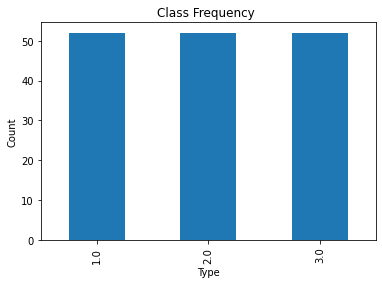

In [ ]:
#Plot the class distribution
label.value_counts().plot(kind='bar', title="Class Frequency ", 
                                 xlabel="Type", 
                                 ylabel="Count")

In [ ]:
#Split the data to train test 80:20
X_train,X_test,Y_train,Y_test = train_test_split(data,label,test_size=0.2,random_state=432)
print("Train Samples",X_train.shape)
print("Test Samples",X_test.shape)

Train Samples (124, 10000)
Test Samples (32, 10000)


In [ ]:
X_train=X_train.abs()#*100000
X_test=X_test.abs() #*100000

In [ ]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
143,0.001067,0.001062,0.001058,0.001053,0.001049,0.001045,0.001040,0.001036,0.001032,0.001028,...,0.088700,0.088693,0.088685,0.088678,0.088671,0.088663,0.088655,0.088648,0.088640,0.088632
52,0.038708,0.038658,0.038607,0.038553,0.038498,0.038441,0.038382,0.038322,0.038259,0.038196,...,0.441027,0.441196,0.441366,0.441537,0.441710,0.441885,0.442061,0.442239,0.442418,0.442598
18,0.017009,0.016949,0.016888,0.016828,0.016768,0.016709,0.016650,0.016592,0.016534,0.016476,...,0.041997,0.042177,0.042361,0.042547,0.042735,0.042926,0.043120,0.043316,0.043515,0.043716
113,0.000447,0.000445,0.000444,0.000443,0.000442,0.000441,0.000440,0.000439,0.000438,0.000437,...,0.010007,0.010006,0.010005,0.010005,0.010004,0.010003,0.010002,0.010002,0.010001,0.010000
37,0.013715,0.013633,0.013553,0.013474,0.013396,0.013320,0.013245,0.013171,0.013099,0.013028,...,0.157993,0.157986,0.157979,0.157971,0.157964,0.157955,0.157947,0.157938,0.157928,0.157918
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,0.007882,0.007878,0.007873,0.007869,0.007864,0.007860,0.007855,0.007850,0.007845,0.007839,...,0.015701,0.015698,0.015695,0.015691,0.015687,0.015683,0.015678,0.015673,0.015668,0.015662
96,0.068684,0.068527,0.068368,0.068208,0.068045,0.067881,0.067716,0.067549,0.067381,0.067211,...,6.259507,6.259813,6.260118,6.260424,6.260730,6.261036,6.261343,6.261649,6.261956,6.262263
107,0.000292,0.000290,0.000289,0.000287,0.000286,0.000284,0.000283,0.000282,0.000280,0.000279,...,0.014560,0.014561,0.014562,0.014563,0.014564,0.014565,0.014566,0.014567,0.014568,0.014569
128,0.000405,0.000405,0.000405,0.000405,0.000405,0.000405,0.000406,0.000406,0.000406,0.000406,...,0.005292,0.005292,0.005292,0.005292,0.005292,0.005292,0.005292,0.005292,0.005292,0.005292


In [ ]:
# Feature Scaling
sc = StandardScaler()
X_trains = sc.fit_transform(X_train)
X_tests = sc.transform(X_test)

# SVM Classification

## RBF Kernel

In [ ]:
# SVM Classification
svcrbf=SVC(kernel="rbf", C=130) 
svcrbf.fit(X_trains,Y_train)
#Y_pred = svc.predict(X_test)

#print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred))
cv1 = RepeatedKFold(n_splits=10, n_repeats=400,random_state=42)
score = cross_val_score(svcrbf, X_tests, Y_test, scoring='accuracy', cv=cv1)
print("Accuracy = " )
print(np.mean(score))
#With scaling, C-130- 73.80
#With scaling, C-130,n_repeat 100- 73.99
#With scaling, C-130,n_repeat 200- 74.07
#With scaling, C-130,n_repeat 400- 74.42

Accuracy = 
0.7442708333333332


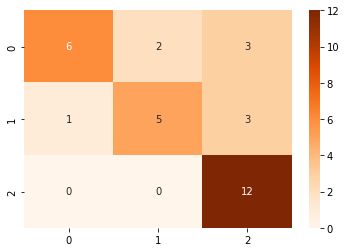

In [ ]:
# Plotting confusion Matrix for Knn
from sklearn.metrics import confusion_matrix
Y_predsvm = cross_val_predict(svcrbf, X_test, Y_test, cv=10)

cf_matrix = confusion_matrix(Y_test, Y_predsvm)
sns.heatmap(cf_matrix, annot=True, fmt='.0f', cmap="Oranges")
plt.show()

In [ ]:
# Classification Report of SVM
print(classification_report(Y_test, Y_predsvm, 
                            target_names = ['1','2','3']))

              precision    recall  f1-score   support

           1       0.86      0.55      0.67        11
           2       0.71      0.56      0.63         9
           3       0.67      1.00      0.80        12

    accuracy                           0.72        32
   macro avg       0.75      0.70      0.70        32
weighted avg       0.75      0.72      0.70        32



In [ ]:
# precision tp / (tp + fp)
precision = precision_score(Y_test, Y_predsvm,average='macro')
print('Precision: %f' % precision)

# recall: tp / (tp + fn)
recall = recall_score(Y_test, Y_predsvm,average='macro')
print('Recall: %f' % recall)

f1score = 2*((precision*recall)/(precision+recall))
print('F1 score: %f' % f1score)

Precision: 0.746032
Recall: 0.700337
F1 score: 0.722462


## Linear Kernel

In [ ]:
# SVM Classification
svclin=SVC(kernel="linear",C=150) 
svclin.fit(X_trains,Y_train)
#Y_pred = svc.predict(X_test)

#print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred))
cv1 = RepeatedKFold(n_splits=10, n_repeats=90,random_state=42)
score = cross_val_score(svclin, X_tests, Y_test, scoring='accuracy', cv=cv1)
print("Accuracy = " )
print(np.mean(score))
#Without scale-71.39
# With Sacling, C-130 -88.86
# With Sacling, C-150,n_splits=10, n_repeats=90 -88.88



Accuracy = 
0.888148148148148


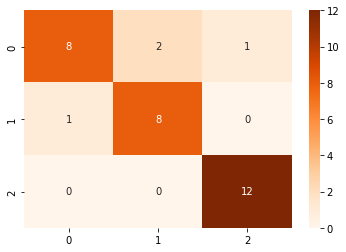

In [ ]:
# Plotting confusion Matrix for Knn
from sklearn.metrics import confusion_matrix
Y_predsvm = cross_val_predict(svclin, X_tests, Y_test, cv=10)
cf_matrix = confusion_matrix(Y_test, Y_predsvm)
sns.heatmap(cf_matrix, annot=True, fmt='.0f', cmap="Oranges")
plt.show()

In [ ]:
# Classification Report of SVM
print(classification_report(Y_test, Y_predsvm, 
                            target_names = ['1','2','3']))

              precision    recall  f1-score   support

           1       0.89      0.73      0.80        11
           2       0.80      0.89      0.84         9
           3       0.92      1.00      0.96        12

    accuracy                           0.88        32
   macro avg       0.87      0.87      0.87        32
weighted avg       0.88      0.88      0.87        32



In [ ]:
# precision tp / (tp + fp)
precision = precision_score(Y_test, Y_predsvm,average='macro')
print('Precision: %f' % precision)

# recall: tp / (tp + fn)
recall = recall_score(Y_test, Y_predsvm,average='macro')
print('Recall: %f' % recall)

f1score = 2*((precision*recall)/(precision+recall))
print('F1 score: %f' % f1score)

Precision: 0.870655
Recall: 0.872054
F1 score: 0.871354


## Polynomial Kernel

In [ ]:
# SVM Classification using polynomial kernel
svcpoly=SVC(kernel="sigmoid",C=130) 
svcpoly.fit(X_trains,Y_train)


#Y_pred = svc1.predict(X_test)

#print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred))
cv1 = RepeatedKFold(n_splits=20, n_repeats=100,random_state=42)
score = cross_val_score(svcpoly, X_tests, Y_test, scoring='accuracy', cv=cv1)
print("Accuracy = " )
print(np.mean(score))

#With scaling- n_splits=20, n_repeats=70-- 75.0
#With scaling- n_splits=20, n_repeats=90-- 75.19
#With scaling- n_splits=20, n_repeats=90-- 75.32


Accuracy = 
0.75325


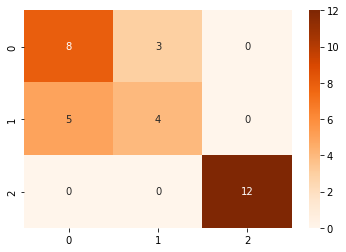

In [ ]:
# Plotting confusion Matrix for Knn
from sklearn.metrics import confusion_matrix
Y_predsvm = cross_val_predict(svcpoly, X_tests, Y_test, cv=10)
cf_matrix = confusion_matrix(Y_test, Y_predsvm)
sns.heatmap(cf_matrix, annot=True, fmt='.0f', cmap="Oranges")
plt.show()

In [ ]:
# Classification Report of SVM
print(classification_report(Y_test, Y_predsvm, 
                            target_names = ['1','2','3']))

              precision    recall  f1-score   support

           1       0.62      0.73      0.67        11
           2       0.57      0.44      0.50         9
           3       1.00      1.00      1.00        12

    accuracy                           0.75        32
   macro avg       0.73      0.72      0.72        32
weighted avg       0.75      0.75      0.74        32



In [ ]:
# precision tp / (tp + fp)
precision = precision_score(Y_test, Y_predsvm,average='macro')
print('Precision: %f' % precision)

# recall: tp / (tp + fn)
recall = recall_score(Y_test, Y_predsvm,average='macro')
print('Recall: %f' % recall)

f1score = 2*((precision*recall)/(precision+recall))
print('F1 score: %f' % f1score)

Precision: 0.728938
Recall: 0.723906
F1 score: 0.726413


In [ ]:
#Helper function to plot the decision boundary
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

    # highlight test samples
    if test_idx:
        # plot all samples
        if not versiontuple(np.__version__) >= versiontuple('1.9.0'):
            X_test, y_test = X[list(test_idx), :], y[list(test_idx)]
            warnings.warn('Please update to NumPy 1.9.0 or newer')
        else:
            X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    alpha=1.0,
                    linewidths=1,
                    marker='o',
                    s=55, label='test set')

In [ ]:
# Visualize the decision boundaries
plot_decision_regions(X_train, Y_train, classifier=svcrbf)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# Decision Tree

In [ ]:
decisiontree1 = DecisionTreeClassifier(criterion    =  'entropy',
                                          max_depth    =  30,
                                          random_state=0 )
decisiontree1.fit(X_trains,Y_train)
    #Y_pred = decisiontree.predict(X_test)

    #print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred))
cv2 = RepeatedKFold(n_splits=10, n_repeats=70,random_state=42)
    
score = cross_val_score(decisiontree1, X_tests, Y_test, scoring='accuracy', cv=cv2)
print('Depth=%d : %.3f' % (10, (np.mean(score))))

# With scaling-depth:20, n_splits=10, n_repeats=70---- 75.9

Depth=10 : 0.759


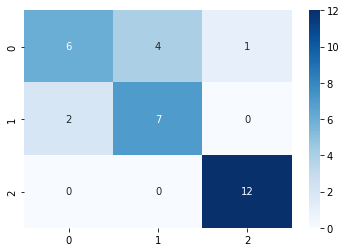

In [ ]:
# Plotting confusion Matrix for decisiontree
from sklearn.metrics import confusion_matrix
Y_preddt = cross_val_predict(decisiontree1, X_tests, Y_test, cv=10)

cf_matrix = confusion_matrix(Y_test, Y_preddt)
sns.heatmap(cf_matrix, annot=True, fmt='.0f', cmap="Blues")
plt.show()

### DT's of different depth

In [ ]:
# Decision Tree classification
for i in range(5,20):
    decisiontree2 = DecisionTreeClassifier(criterion    =  'entropy',
                                          max_depth    =  i,
                                          random_state=0 )
    decisiontree2.fit(X_train,Y_train)
    #Y_pred = decisiontree.predict(X_test)

    #print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred))
    cv2 = RepeatedKFold(n_splits=20, n_repeats=20,random_state=42)
    
    score = cross_val_score(decisiontree2, X_test, Y_test, scoring='accuracy', cv=cv2)
    print('Depth=%d : %.3f' % (i, (np.mean(score))))
    

In [ ]:
# Plotting confusion Matrix for decisiontree
from sklearn.metrics import confusion_matrix
Y_preddt = cross_val_predict(decisiontree2, X_tests, Y_test, cv=10)

cf_matrix = confusion_matrix(Y_test, Y_preddt)
sns.heatmap(cf_matrix, annot=True, fmt='.0f', cmap="Blues")
plt.show()

In [ ]:
# Classification Report of DT
print(classification_report(Y_test, Y_preddt, 
                            target_names = ['class 1','class2','class3']))

              precision    recall  f1-score   support

     class 1       0.75      0.55      0.63        11
      class2       0.64      0.78      0.70         9
      class3       0.92      1.00      0.96        12

    accuracy                           0.78        32
   macro avg       0.77      0.77      0.76        32
weighted avg       0.78      0.78      0.77        32



In [ ]:
# precision tp / (tp + fp)
precision = precision_score(Y_test, Y_preddt,average='macro')
print('Precision: %f' % precision)

# recall: tp / (tp + fn)
recall = recall_score(Y_test, Y_preddt,average='macro')
print('Recall: %f' % recall)

f1score = 2*((precision*recall)/(precision+recall))
print('F1 score: %f' % f1score)

Precision: 0.769814
Recall: 0.774411
F1 score: 0.772105


In [ ]:
os.environ["PATH"] += os.pathsep + 'C:\Program Files\Graphviz\bin/'

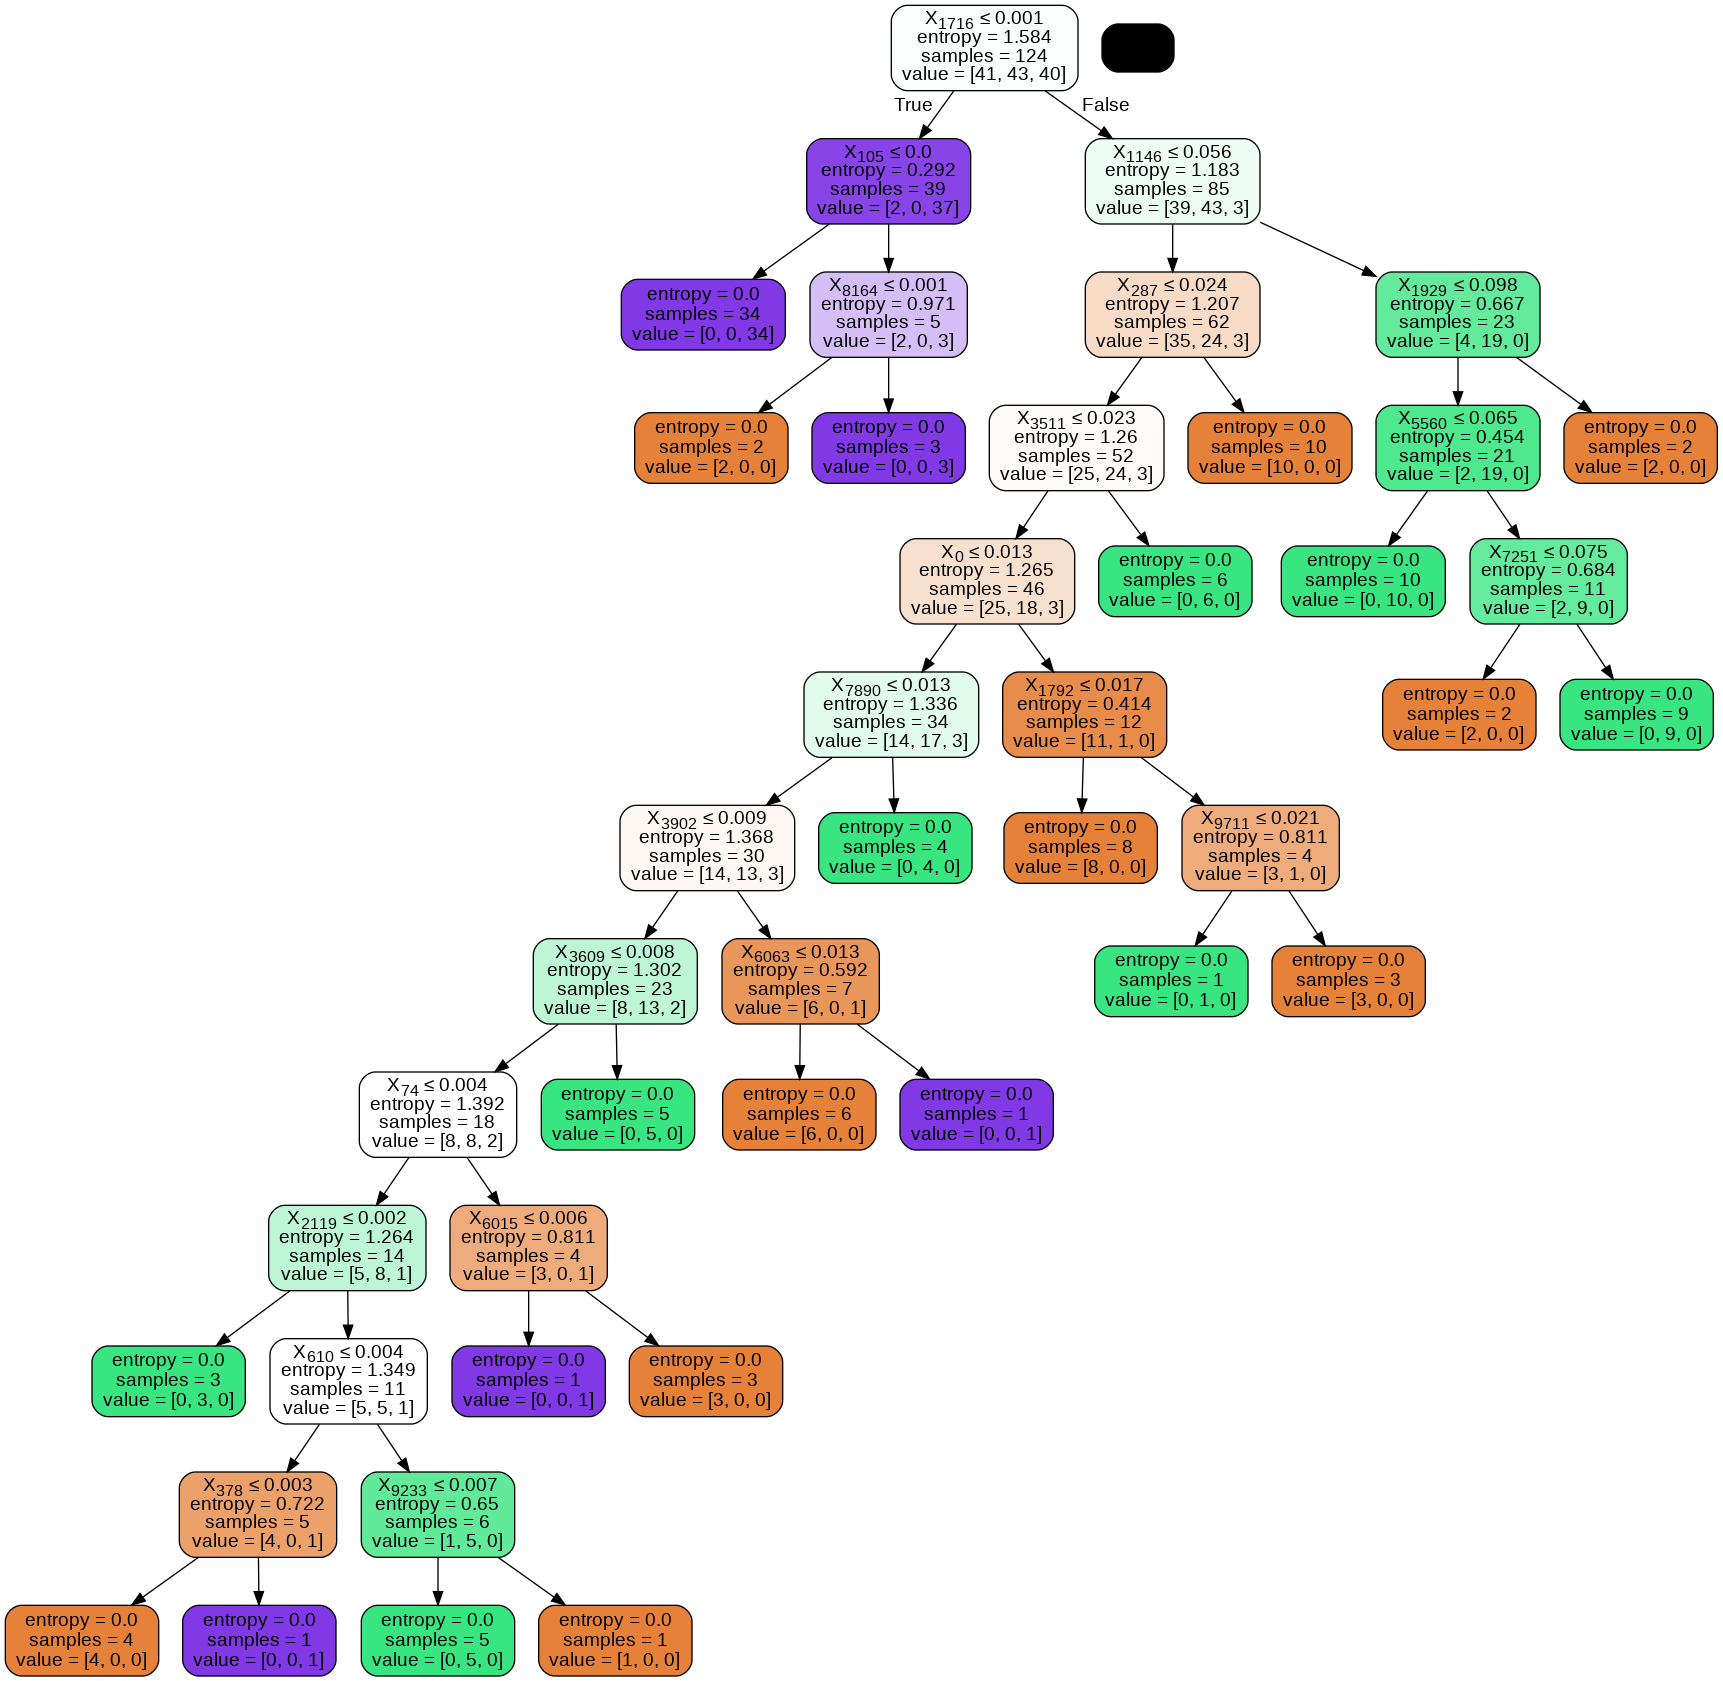

In [ ]:
# Plot the Decision Tree
# https://www.dasca.org/world-of-big-data/article/know-how-to-create-and-visualize-a-decision-tree-with-python 
import matplotlib.pyplot as plt
import six
import sys
sys.modules['sklearn.externals.six'] = six
from sklearn.externals.six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(decisiontree1, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())


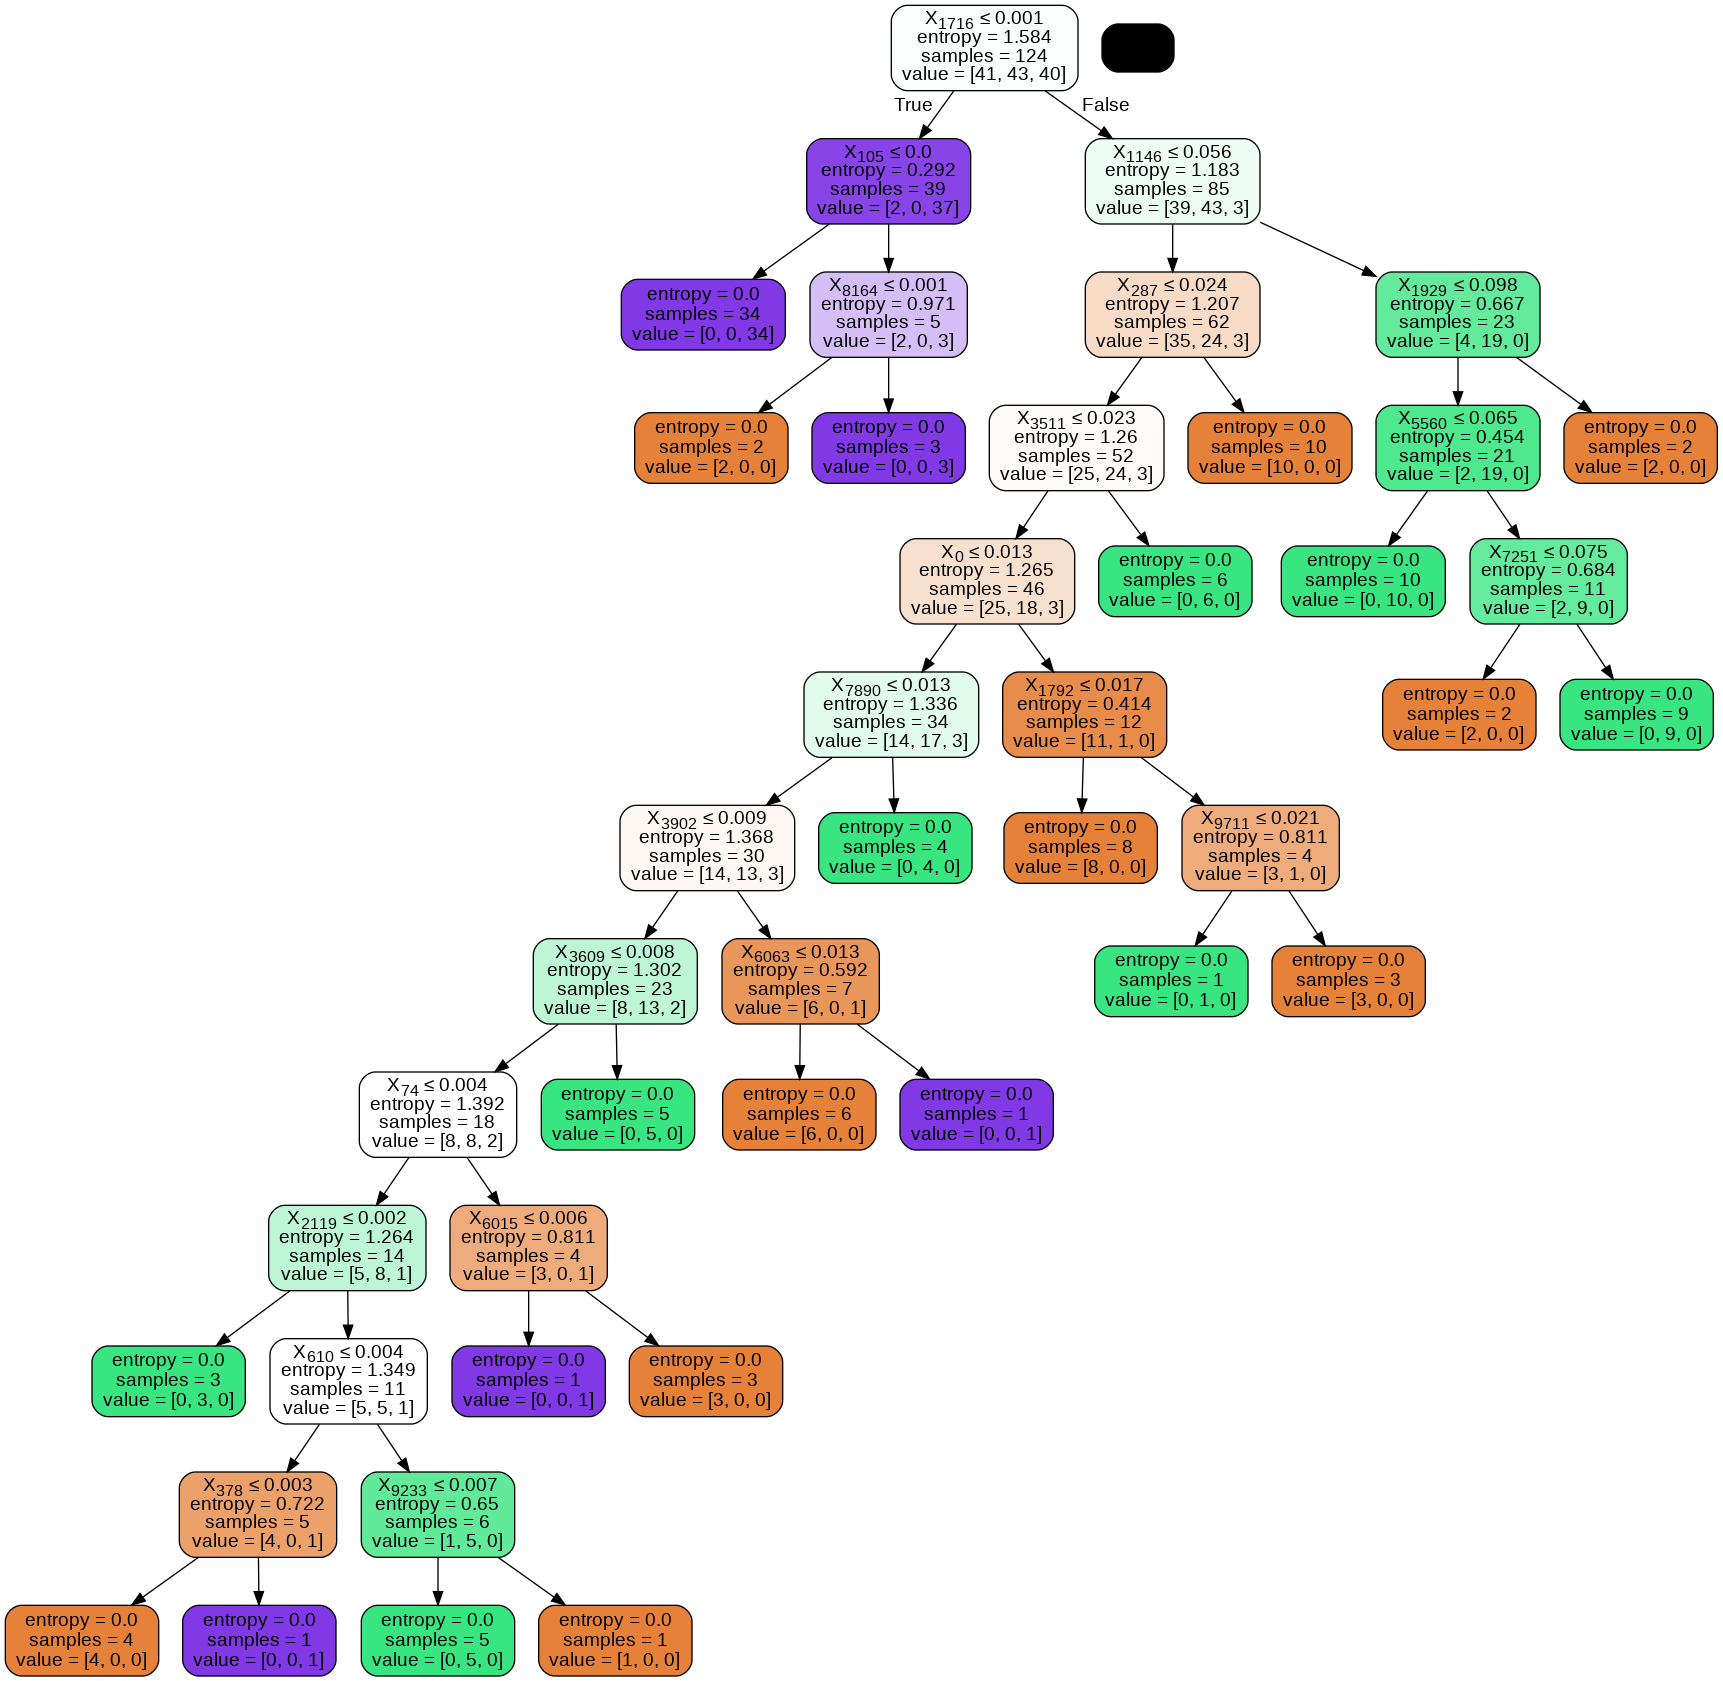

In [ ]:
# Plot the Decision Tree-- Gini Index
# https://www.dasca.org/world-of-big-data/article/know-how-to-create-and-visualize-a-decision-tree-with-python 
import matplotlib.pyplot as plt
import six
import sys
sys.modules['sklearn.externals.six'] = six
from sklearn.externals.six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(decisiontree1, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

# Random Forest

In [ ]:
# random forest classification
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=500)
rf.fit(X_trains,Y_train)
#Y_pred = rf.predict(X_test)
#print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred))
cv1 = RepeatedKFold(n_splits=32, n_repeats=70,random_state=42)
score = cross_val_score(rf, X_tests, Y_test, scoring='accuracy', cv=cv1)
print("Accuracy = " )
print(np.mean(score))
# With scaling-85.17    ----  n_repeats=70, n_estimators=100

Accuracy = 
0.859375


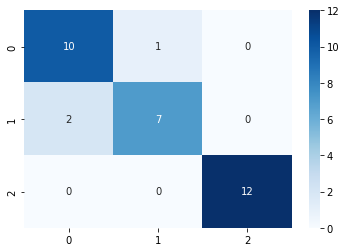

In [ ]:
# Plotting confusion Matrix for random forest
from sklearn.metrics import confusion_matrix
Y_predrf = cross_val_predict(rf, X_tests, Y_test, cv=10)

cf_matrix = confusion_matrix(Y_test, Y_predrf)
sns.heatmap(cf_matrix, annot=True, fmt='.0f', cmap="Blues")
plt.show()

In [ ]:
# Classification Report of rf
print(classification_report(Y_test, Y_predrf, 
                            target_names = ['class 1','class2','class3']))

              precision    recall  f1-score   support

     class 1       0.83      0.91      0.87        11
      class2       0.88      0.78      0.82         9
      class3       1.00      1.00      1.00        12

    accuracy                           0.91        32
   macro avg       0.90      0.90      0.90        32
weighted avg       0.91      0.91      0.91        32



In [ ]:
# precision tp / (tp + fp)
precision = precision_score(Y_test, Y_predrf,average='macro')
print('Precision: %f' % precision)

# recall: tp / (tp + fn)
recall = recall_score(Y_test, Y_predrf,average='macro')
print('Recall: %f' % recall)

f1score = 2*((precision*recall)/(precision+recall))
print('F1 score: %f' % f1score)

Precision: 0.902778
Recall: 0.895623
F1 score: 0.899186


# XG Boost

In [ ]:
import xgboost as xgb

xgb_cl = xgb.XGBClassifier(max_depth=10)
#print(xgb_cl)

In [ ]:

param_grid = {
    "max_depth": [3, 4, 5, 7],
    "learning_rate": [0.1, 0.01, 0.05],
    "gamma": [0, 0.25, 1],
    "reg_lambda": [0, 1, 10],
    "scale_pos_weight": [1, 3, 5],
    "subsample": [0.8],
    "colsample_bytree": [0.5],
}

In [ ]:
#hyper parameter tuning
from sklearn.model_selection import GridSearchCV

# Init classifier
xgb_cl = xgb.XGBClassifier(objective="binary:logistic")

# Init Grid Search
grid_cv = GridSearchCV(xgb_cl, param_grid, n_jobs=-1, cv=3, scoring="roc_auc")

# Fit
_ = grid_cv.fit(X_train, Y_train)

In [ ]:
xgb_cl.fit(X_train, Y_train)


XGBClassifier(max_depth=10, objective='multi:softprob')

In [ ]:
preds = xgb_cl.predict(X_test)

In [ ]:
accuracy_score(Y_test, preds)

0.59375

# Naive Bayes

In [ ]:
# naive bayes classification
from sklearn import naive_bayes
nb = naive_bayes.GaussianNB()
nb.fit(X_trains,Y_train)


#Y_pred = nb.predict(X_test)

#print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred))
cv1 = RepeatedKFold(n_splits=20, n_repeats=20,random_state=42)
score = cross_val_score(nb, X_tests, Y_test, scoring='accuracy', cv=cv1)
print("Accuracy = " )
print(np.mean(score))

Accuracy = 
0.83375


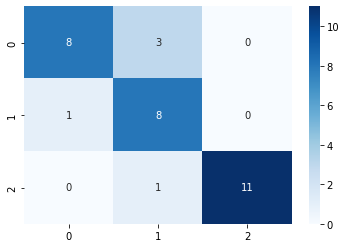

In [ ]:
# Plotting confusion Matrix for NB
from sklearn.metrics import confusion_matrix
Y_prednb = cross_val_predict(nb, X_tests, Y_test, cv=10)

cf_matrix = confusion_matrix(Y_test, Y_prednb)
sns.heatmap(cf_matrix, annot=True, fmt='.0f', cmap="Blues")
plt.show()

In [ ]:
# Classification Report of nb
print(classification_report(Y_test, Y_prednb, 
                            target_names = ['class 1','class2','class3']))

              precision    recall  f1-score   support

     class 1       0.89      0.73      0.80        11
      class2       0.67      0.89      0.76         9
      class3       1.00      0.92      0.96        12

    accuracy                           0.84        32
   macro avg       0.85      0.84      0.84        32
weighted avg       0.87      0.84      0.85        32



In [ ]:
# precision tp / (tp + fp)
precision = precision_score(Y_test, Y_prednb,average='macro')
print('Precision: %f' % precision)

# recall: tp / (tp + fn)
recall = recall_score(Y_test, Y_prednb,average='macro')
print('Recall: %f' % recall)

f1score = 2*((precision*recall)/(precision+recall))
print('F1 score: %f' % f1score)

Precision: 0.851852
Recall: 0.844276
F1 score: 0.848047


# Model development with pca

In [ ]:
# Feature Scaling
sc = StandardScaler()
X_trainp = sc.fit_transform(X_train)
X_testp = sc.transform(X_test)

In [ ]:
# Using PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=100)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)


In [ ]:
# SVM Classification
svcrbf=SVC(kernel="linear",C=110) 
svcrbf.fit(X_train_pca,Y_train)
#Y_pred = svc.predict(X_test)

#print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred))
cv1 = RepeatedKFold(n_splits=20, n_repeats=20,random_state=42)
score = cross_val_score(svcrbf, X_test_pca, Y_test, scoring='accuracy', cv=cv1)
print("Accuracy = " )
print(np.mean(score))

Accuracy = 
0.8675


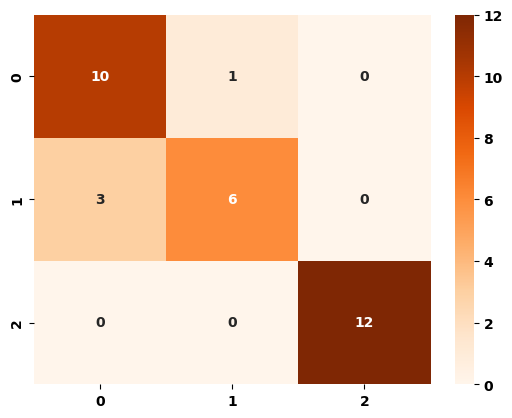

In [ ]:
# Plotting confusion Matrix for Knn
from sklearn.metrics import confusion_matrix
Y_predsvm = cross_val_predict(svcrbf, X_test_pca, Y_test, cv=10)

cf_matrix = confusion_matrix(Y_test, Y_predsvm)
sns.heatmap(cf_matrix, annot=True, fmt='.0f', cmap="Oranges")
plt.show()

In [ ]:
# SVM Classification
svclin=SVC(kernel="linear") 
svclin.fit(X_train_pca,Y_train)
#Y_pred = svc.predict(X_test)

#print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred))
cv1 = RepeatedKFold(n_splits=20, n_repeats=20,random_state=42)
score = cross_val_score(svclin, X_test_pca, Y_test, scoring='accuracy', cv=cv1)
print("Accuracy = " )
print(np.mean(score))

Accuracy = 
0.86375


In [ ]:
X_train_pca.shape

(124, 50)

In [ ]:
X_train.shape

(124, 50000)

In [ ]:
X_train_pca[:,1]
    

array([  5.17543723,  25.06364822,  -6.56407012,   5.66178013,
        10.6619978 ,  -5.54815705,   5.52838451,   5.56432219,
        12.24542322,   7.32955355,  11.54030761,  -7.99468853,
         9.98383584,  -5.04099433,   8.84376512,  46.98885136,
       -24.95253599,  12.87080273,   5.57707674, 166.51352534,
         5.60682362,  -3.20659996,   5.59210381,   5.78438903,
         5.67973788,   2.85792846, -26.17282582,   1.78336002,
         7.34506055, -25.58690522,  -2.01955332,   1.32279323,
         5.63899434, -18.5227804 , -25.61364076, -74.64934337,
        37.16201659,   5.56806632, -17.14493532,   5.57352886,
       -17.54269651,  30.41569879,   7.86298615,   6.71762911,
       -41.98682591,   5.38107021,   6.2327132 ,   5.32308449,
       -23.87997183,   5.78195106,  27.61449436,   6.1014497 ,
       -32.21061776, -12.45362579, -11.01610328,   5.83675241,
        25.06364822, -19.66226642, -11.08772745,  36.61034481,
        19.54531055, -14.38195116, -25.61364076,  -6.85